In [131]:
## Imports 
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from scipy import stats



You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [132]:
## Loading data
data = pd.read_csv("./Dataset/city_day.csv")

In [133]:
data['Date'] = pd.to_datetime(data['Date'])


DATA EXPLORATION 

In [134]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [135]:
data.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [136]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  Benzene      23908 non-null  float64       
 12  Toluene      21490 non-null  float64       
 13  Xylene       11422 non-null  float64       
 14  AQI          24850 non-null  float64       
 15  Air_quality  24850 non-null  object        
dtypes: d

In [137]:
print(data.describe())

                                Date         PM2.5          PM10  \
count                          29531  24933.000000  18391.000000   
mean   2018-05-14 05:40:15.807118080     67.450578    118.127103   
min              2015-01-01 00:00:00      0.040000      0.010000   
25%              2017-04-16 00:00:00     28.820000     56.255000   
50%              2018-08-05 00:00:00     48.570000     95.680000   
75%              2019-09-03 00:00:00     80.590000    149.745000   
max              2020-07-01 00:00:00    949.990000   1000.000000   
std                              NaN     64.661449     90.605110   

                 NO           NO2           NOx           NH3            CO  \
count  25949.000000  25946.000000  25346.000000  19203.000000  27472.000000   
mean      17.574730     28.560659     32.309123     23.483476      2.248598   
min        0.020000      0.010000      0.000000      0.010000      0.000000   
25%        5.630000     11.750000     12.820000      8.580000      0.51

In [138]:
print(data.shape)

(29531, 16)


In [139]:
print('Columns:', data.columns)

Columns: Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'Air_quality'],
      dtype='object')


In [140]:
# Display the data types of each column
print('Data types:', data.dtypes)

Data types: City                   object
Date           datetime64[ns]
PM2.5                 float64
PM10                  float64
NO                    float64
NO2                   float64
NOx                   float64
NH3                   float64
CO                    float64
SO2                   float64
O3                    float64
Benzene               float64
Toluene               float64
Xylene                float64
AQI                   float64
Air_quality            object
dtype: object


DATA CLEANING

missingno` is a Python library used for visualizing missing data in datasets
It provides a suite of visualizations and statistical tests for missing data completeness and pattern,
making it easier for data analysts to understand and address the presence of missing data

City               0
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
Air_quality     4681
dtype: int64


<Axes: >

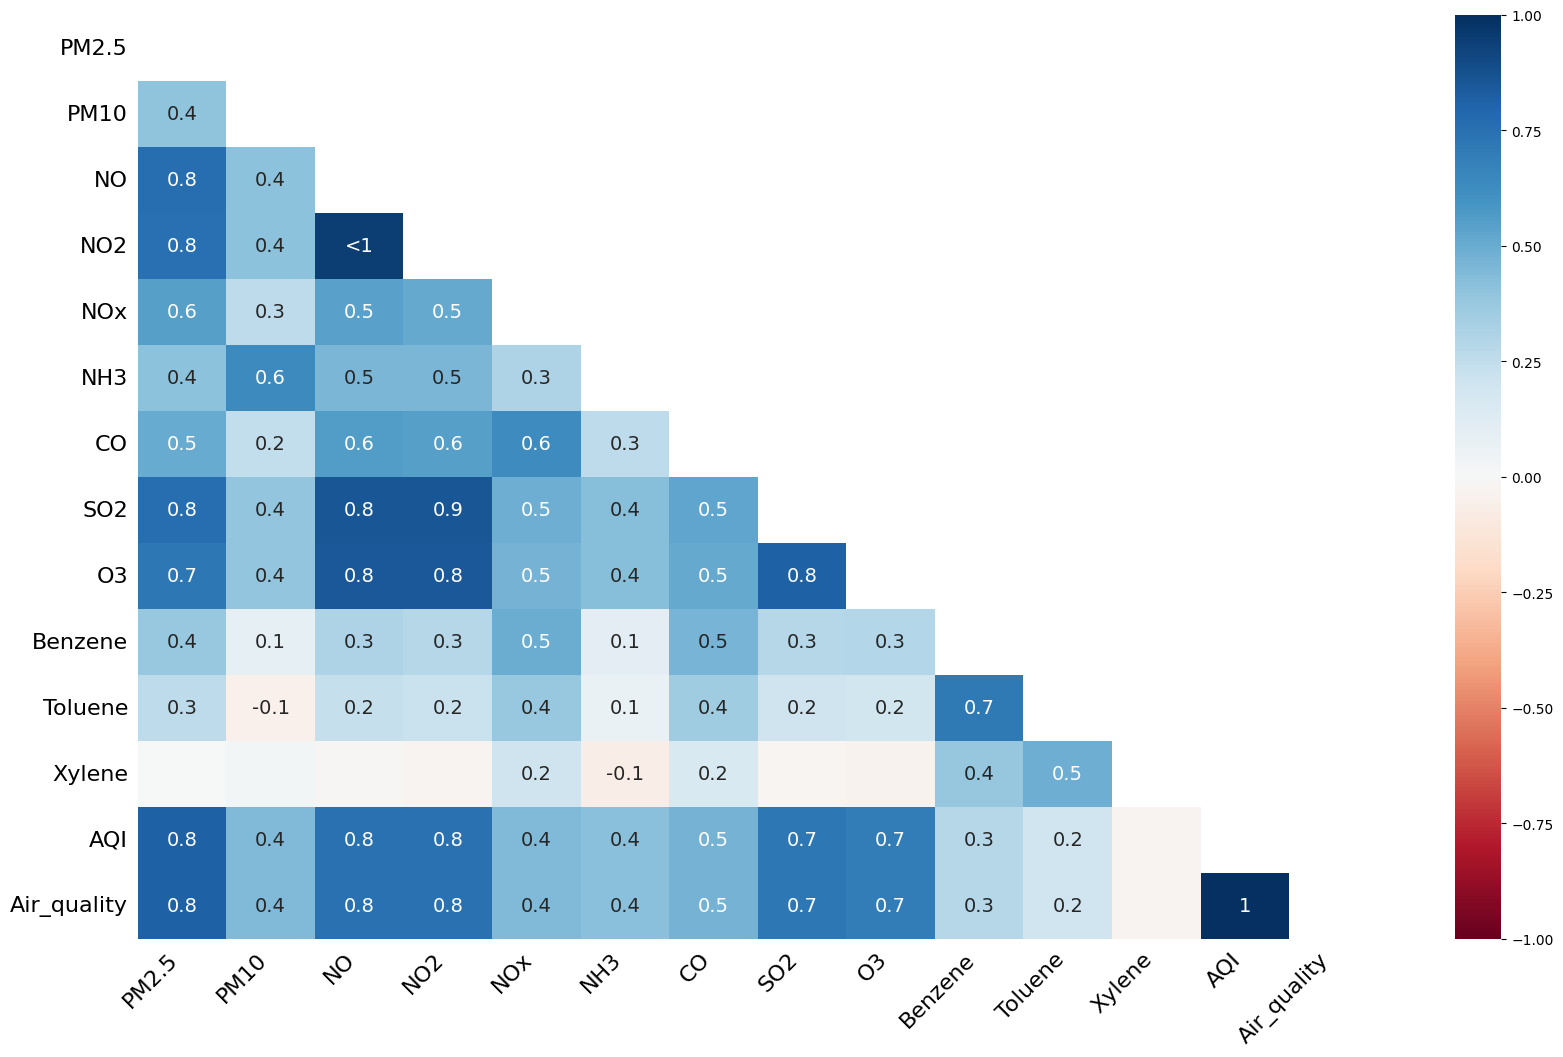

In [141]:
# Check for missing values
print(data.isnull().sum())
msno.heatmap(data)

Handling Missing Values

In [142]:
# # Fill missing values with mean
for col in data.columns:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col].fillna(data[col].mean(), inplace=True)

In [143]:
# Check for missing values after Handling it
print(data.isnull().sum())

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
Air_quality    4681
dtype: int64


In [144]:
# Statistical summary
print(data.describe())

                                Date         PM2.5          PM10           NO  \
count                          29531  29531.000000  29531.000000  29531.00000   
mean   2018-05-14 05:40:15.807118080     67.450578    118.127103     17.57473   
min              2015-01-01 00:00:00      0.040000      0.010000      0.02000   
25%              2017-04-16 00:00:00     32.150000     79.315000      6.21000   
50%              2018-08-05 00:00:00     58.030000    118.127103     11.53000   
75%              2019-09-03 00:00:00     72.450000    118.127103     17.57473   
max              2020-07-01 00:00:00    949.990000   1000.000000    390.68000   
std                              NaN     59.414476     71.500953     21.35922   

                NO2           NOx           NH3            CO           SO2  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      28.560659     32.309123     23.483476      2.248598     14.531977   
min        0.010000      0.000000

In [145]:

# Correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


            PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.558079  0.426375  0.344341  0.380725  0.189227  0.086663   
PM10     0.558079  1.000000  0.431006  0.359165  0.415133  0.223025  0.047517   
NO       0.426375  0.431006  1.000000  0.462402  0.746223  0.156394  0.211639   
NO2      0.344341  0.359165  0.462402  1.000000  0.574190  0.165984  0.353237   
NOx      0.380725  0.415133  0.746223  0.574190  1.000000  0.128051  0.225097   
NH3      0.189227  0.223025  0.156394  0.165984  0.128051  1.000000  0.020029   
CO       0.086663  0.047517  0.211639  0.353237  0.225097  0.020029  1.000000   
SO2      0.119512  0.176188  0.166190  0.382758  0.208355 -0.021005  0.472583   
O3       0.155330  0.203595  0.014218  0.285448  0.083063  0.078688  0.039787   
Benzene  0.021934  0.019215  0.033901  0.025082  0.037383 -0.011864  0.061351   
Toluene  0.107788  0.121983  0.134201  0.254074  0.168780  0.007442  0.274882   
Xylene   0.070459  0.031256 

DATA VISUALIZATION

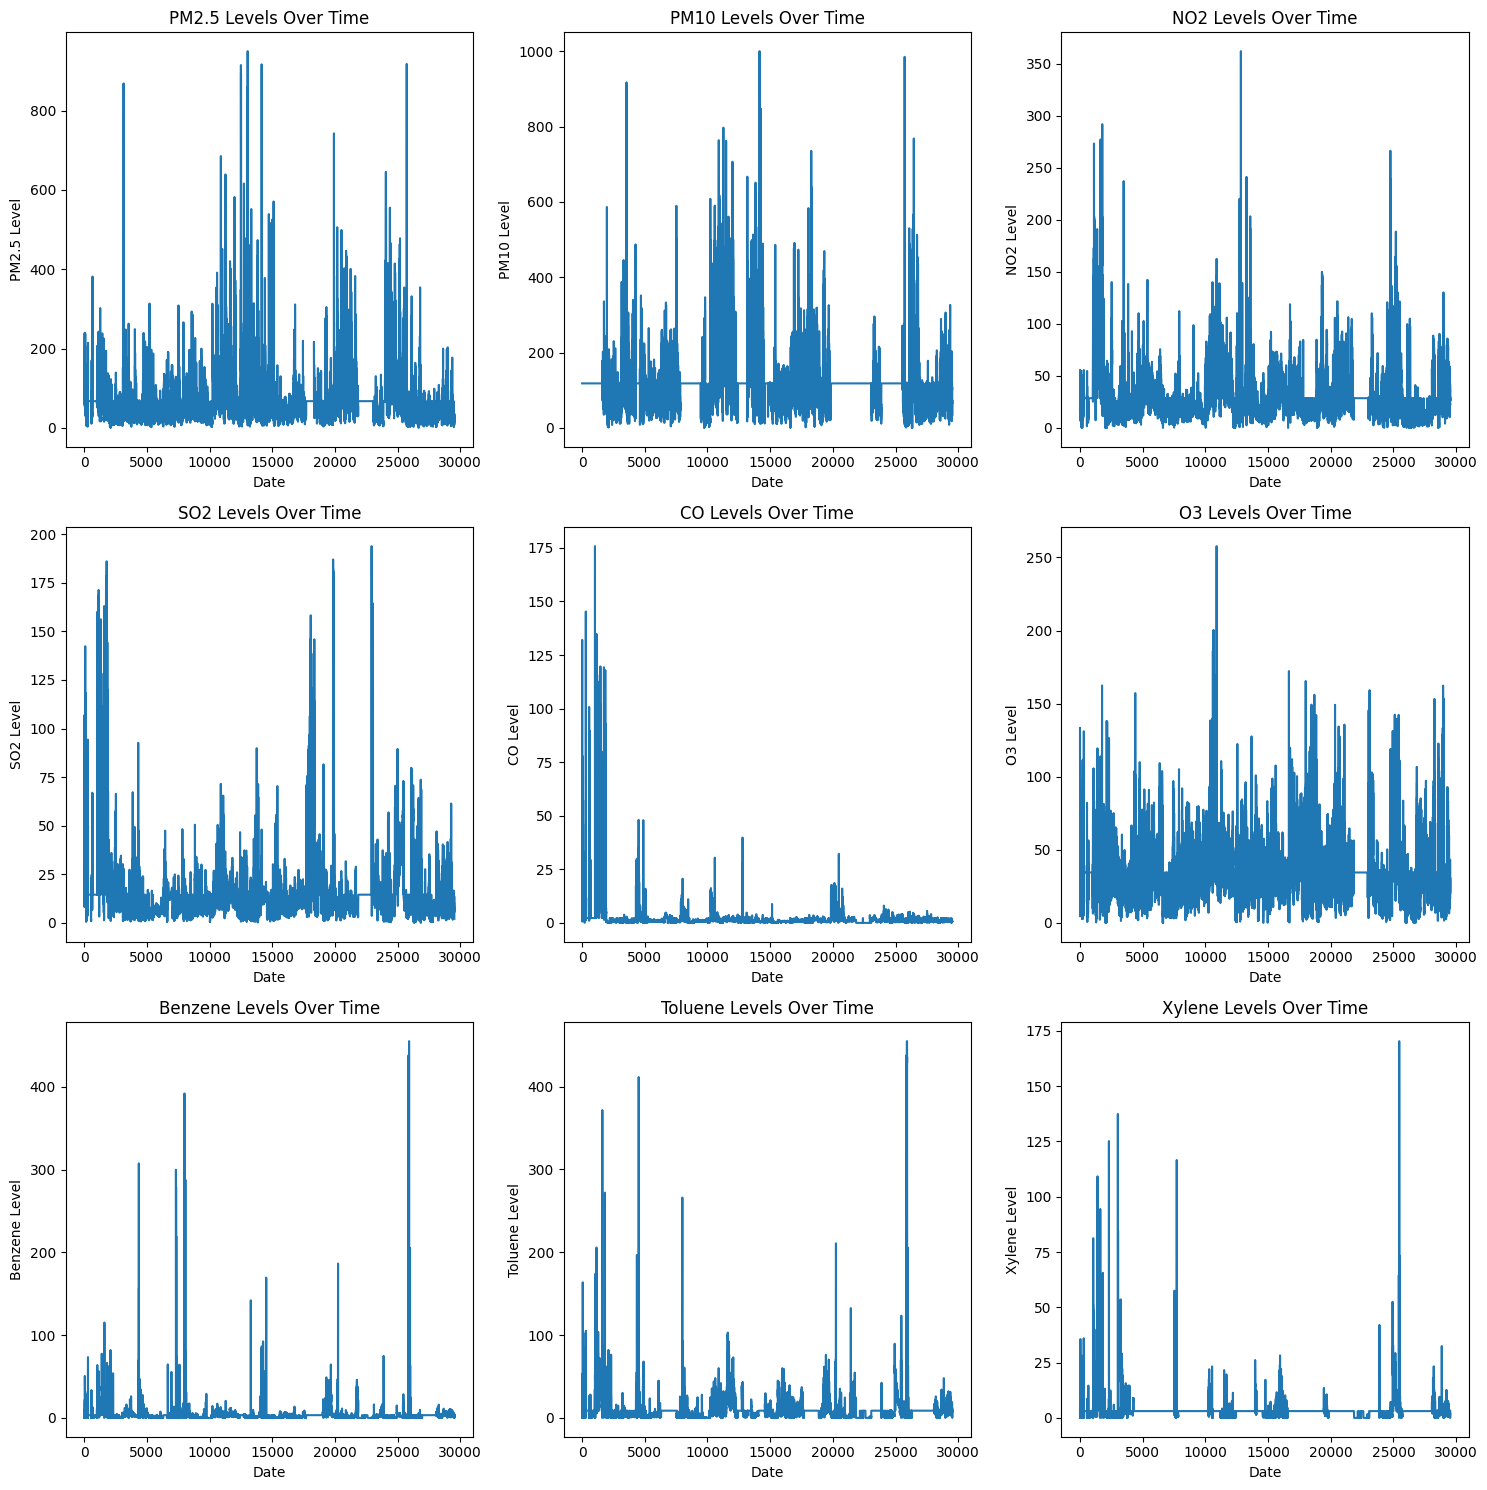

In [146]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

# List of pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3','Benzene','Toluene','Xylene']

# Plot each pollutant
for i, pollutant in enumerate(pollutants):
    axs[i].plot(data.index, data[pollutant])
    axs[i].set_title(f'{pollutant} Levels Over Time')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel(f'{pollutant} Level')

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [147]:
# List of pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3','Benzene','Toluene','Xylene']

# For each pollutant
for pollutant in pollutants:
    # Define a high level
    high_level = data[pollutant].mean() + 2*data[pollutant].std()

    # Find days with high levels
    extreme_events = data[data[pollutant] > high_level]

    print(f'Number of extreme events for {pollutant}:', len(extreme_events))


Number of extreme events for PM2.5: 1375
Number of extreme events for PM10: 1390
Number of extreme events for NO2: 1286
Number of extreme events for SO2: 1169
Number of extreme events for CO: 802
Number of extreme events for O3: 1235
Number of extreme events for Benzene: 199
Number of extreme events for Toluene: 627
Number of extreme events for Xylene: 727
